In [2]:
import sys

In [3]:
sys.path.append("D:\project\AutoML\tabular_nn")

In [22]:
from ultraopt.hdl import hdl2cs

ModuleNotFoundError: No module named 'terminaltables'

In [23]:
HDL = {
            "model(choice)": {
                "linearsvc": {
                    "max_iter": {"_type": "int_quniform", "_value": [300, 3000, 100], "_default": 600},
                    "penalty": {"_type": "choice", "_value": ["l1", "l2"], "_default": "l2"},
                    "dual": {"_type": "choice", "_value": [True, False], "_default": False},
                    "loss": {"_type": "choice", "_value": ["hinge", "squared_hinge"], "_default": "squared_hinge"},
                    "C": {"_type": "loguniform", "_value": [0.01, 10000], "_default": 1.0},
                    "multi_class": "ovr",
                    "random_state": 42,
                    "__forbidden": [
                        {"penalty": "l1", "loss": "hinge"},
                        {"penalty": "l2", "dual": False, "loss": "hinge"},
                        {"penalty": "l1", "dual": False},
                        {"penalty": "l1", "dual": True, "loss": "squared_hinge"},
                    ]
                },
                "svc": {
                    "C": {"_type": "loguniform", "_value": [0.01, 10000], "_default": 1.0},
                    "kernel": {"_type": "choice", "_value": ["rbf", "poly", "sigmoid"], "_default": "rbf"},
                    "degree": {"_type": "int_uniform", "_value": [2, 5], "_default": 3},
                    "gamma": {"_type": "loguniform", "_value": [1e-05, 8], "_default": 0.1},
                    "coef0": {"_type": "quniform", "_value": [-1, 1], "_default": 0},
                    "shrinking": {"_type": "choice", "_value": [True, False], "_default": True},
                    "class_weight": None,
                    "probability": True,
                    "decision_function_shape": "ovr",
                    "__activate": {
                        "kernel": {
                            "rbf": ["gamma"],
                            "sigmoid": ["gamma", "coef0"],
                            "poly": ["degree", "gamma", "coef0"]
                        }
                    },
                    "random_state": 42
                },
            }
        }

In [24]:
CS = hdl2cs(HDL)

NameError: name 'hdl2cs' is not defined

In [ ]:
CS

In [25]:
from hyperopt import hp

In [26]:
import hyperopt.pyll.stochastic


In [27]:
cs={
    "model":hp.choice("model", [
        {
            "linearsvc":{
                "model:linearsvc:C": hp.normal("model:linearsvc:C", 1, 10),
                "model:linearsvc:loss": hp.choice("model:linearsvc:C", ["hinge", "squared_hinge"]),
            }
        },
        {
            "svc":{
                "model:svc:C": hp.normal("model:linearsvc:C", 1, 10),
                "model:svc:loss": hp.choice("model:linearsvc:C", ["hinge", "squared_hinge"]),
            }
        },
    ])
}

In [28]:
hyperopt.pyll.stochastic.sample(cs)

{'model': {'linearsvc': {'model:linearsvc:C': -16.32183664093065,
   'model:linearsvc:loss': 'hinge'}}}

注意：**算法选择变量**的值只能是形为`{'algo_name': {'hyperParam': {'_type': 'uniform', ...}}}`的定义，不能直接定义超参，因为超参不是算法，会引起混乱。

为了加深您的影响，我们举一个错误的例子：

In [29]:
false_HDL = {
    "Classifier(choice)":{
        "SVM": {
            "C":  {"_type": "loguniform", "_value": [0.01, 10000], "_default": 1.0},
        },
        "LDA": {
            "n_components":  {"_type": "int_uniform", "_value": [2, 9], "_default": 2},
        },
        "n_iterations": {"_type": "int_quniform", "_value": [10, 100, 10], "_default": 50}
    }  
}

In [30]:
CS = hdl2cs(false_HDL)

NameError: name 'hdl2cs' is not defined

In [31]:
plot_layered_dict(layering_config(CS.sample_configuration()))

NameError: name 'plot_layered_dict' is not defined

In [9]:
HDL = {
    "feature_engineer(choice)":{
        "feature_selection(choice)":{
            "wrapper(choice)": {
                "RandomForest":{
                    "n_iterations": {"_type": "int_quniform", "_value": [10, 100, 10]},
                    "max_depth": {"_type": "int_quniform", "_value": [3, 7, 2]},
                },
                "LinearRegression":{
                    "C": {"_type": "loguniform", "_value": [0.01, 10000], "_default": 1.0},
                },
            },
            "filter": {
                "score_func": {"_type": "choice", "_value": ["pearsonr", "spearmanr"]}
            }
        },
        "PolynomialFeatures":{
            "degree": {"_type": "int_uniform", "_value": [2, 3]},
            "interaction_only": {"_type": "choice", "_value": [True, False]},
        },
        "decomposition(choice)":{
            "PCA": {
                "n_components": {"_type": "uniform", "_value": [0.8, 0.95]},
                "whiten": {"_type": "choice", "_value": [True, False]},
            },
            "KernelPCA": {
                "n_components": {"_type": "uniform", "_value": [0.8, 0.95]},
                "whiten": {"_type": "choice", "_value": [True, False]},
            },
            "ICA":{}
        }
    }
}

In [10]:
CS = hdl2cs(HDL)

In [11]:
C=CS.get_default_configuration()

In [12]:
C.get_dictionary()

{'feature_engineer:__choice__': 'feature_selection',
 'feature_engineer:feature_selection:__choice__': 'wrapper',
 'feature_engineer:feature_selection:wrapper:__choice__': 'RandomForest',
 'feature_engineer:feature_selection:wrapper:RandomForest:max_depth': 5,
 'feature_engineer:feature_selection:wrapper:RandomForest:n_iterations': 55}

In [13]:
dict_ = C.get_dictionary()

In [14]:
dict_

{'feature_engineer:__choice__': 'feature_selection',
 'feature_engineer:feature_selection:__choice__': 'wrapper',
 'feature_engineer:feature_selection:wrapper:__choice__': 'RandomForest',
 'feature_engineer:feature_selection:wrapper:RandomForest:max_depth': 5,
 'feature_engineer:feature_selection:wrapper:RandomForest:n_iterations': 55}

In [15]:
hierarchical_dict = layering_config(dict_)

In [16]:
hierarchical_dict

{'feature_engineer': {'feature_selection': {'wrapper': {'RandomForest': {'max_depth': 5,
     'n_iterations': 55}}}}}

In [17]:
from ultraopt.hdl.viz import plot_layered_dict

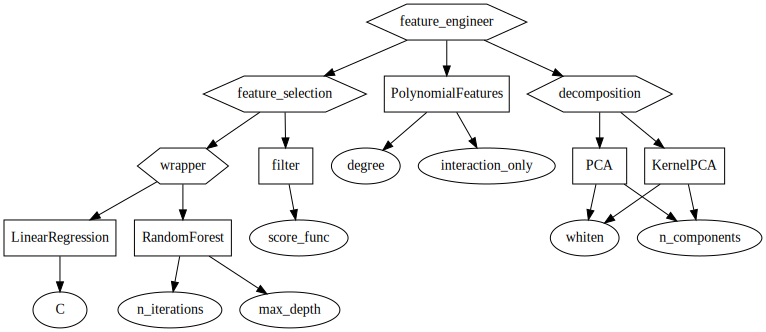

In [18]:
plot_hdl(HDL)

In [19]:
CS.sample_configuration().get_dictionary()

{'feature_engineer:__choice__': 'decomposition',
 'feature_engineer:decomposition:__choice__': 'KernelPCA',
 'feature_engineer:decomposition:KernelPCA:n_components': 0.8246914609645398,
 'feature_engineer:decomposition:KernelPCA:whiten': 'False:bool'}

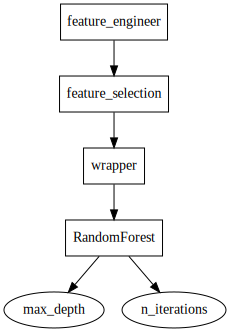

In [20]:
plot_layered_dict(hierarchical_dict)

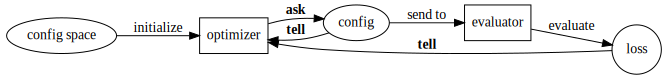

In [20]:
from graphviz import Digraph; g = Digraph()
g.node("config space", shape="ellipse"); g.node("optimizer", shape="box")
g.node("config", shape="ellipse"); g.node("loss", shape="circle"); g.node("evaluator", shape="box")
g.edge("config space", "optimizer", label="initialize"); g.edge("optimizer", "config", label="<<b>ask</b>>")
g.edge("config","evaluator" , label="send to"); g.edge("evaluator","loss" , label="evaluate")
g.edge("config", "optimizer", label="<<b>tell</b>>"); g.edge("loss", "optimizer", label="<<b>tell</b>>")
g.graph_attr['rankdir'] = 'LR'; g